An implementation of Game of life in Python
==========================================
Rules:
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [1]:
# Import the module
from src.life.life import Life

In [2]:
help(Life)

Help on class Life in module src.life.life:

class Life(builtins.object)
 |  Life(filename: str)
 |
 |  A Python implementation of Game of Life.
 |
 |  It is a part of Big Geodata Processing Course in Quartile 1, Year 2.
 |
 |  Rules:
 |  - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
 |  - Any live cell with two or three live neighbours lives on to the next generation.
 |  - Any live cell with more than three live neighbours dies, as if by overpopulation.
 |  - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
 |
 |  Methods defined here:
 |
 |  __init__(self, filename: str)
 |      Creates a Game of Life object.
 |
 |      Args:
 |        filename: Input filename.
 |
 |      Raises:
 |        Exception: If input data is invalid.
 |
 |  getGrid(self)
 |      Returns the grid.
 |
 |  saveGrid(self, output: str = 'output.txt')
 |      Saves the final grid in a text file.
 |
 |      Args:
 |        output: ou

## Key Features for optimization
- Used bitArray instead of python arrays to optimize the memory usage
- Added padding on all sides to avoid extra 'if' conditions which optimized the run time
- Used single-line computations to reduce runtime
- Used inline 'if' conditions to eliminate extra lines to increase readability and reduce runtime speed

### Module Implementaion Starts from here

In [3]:
# Set the input file path, a 1000 x 1000
filename = './tests/data/1000x1000_0.1.txt'

In [4]:
# Initialize the Life object and see the grid
life = Life(filename)
life.getGrid()

[bitarray('00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [5]:
%%time
# Apply 5 iterations to the game
life.tick(num_generations=5)

CPU times: total: 3.39 s
Wall time: 3.43 s


In [6]:
# See the result after 5 iterations
life.getGrid()

[bitarray('00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [7]:
# Save the file to a location (location can be changed using the argument output='file.txt')
life.saveGrid(output='./tests/data/1000x1000_output.txt')

## Optimization results

### Without Optimization

#### Line Profiler

##### Reading the grid
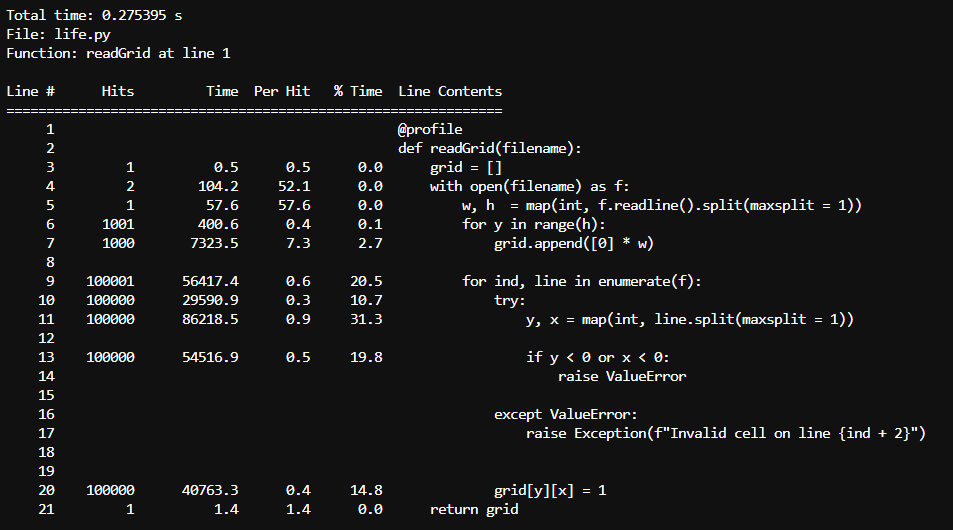

##### Tick Function
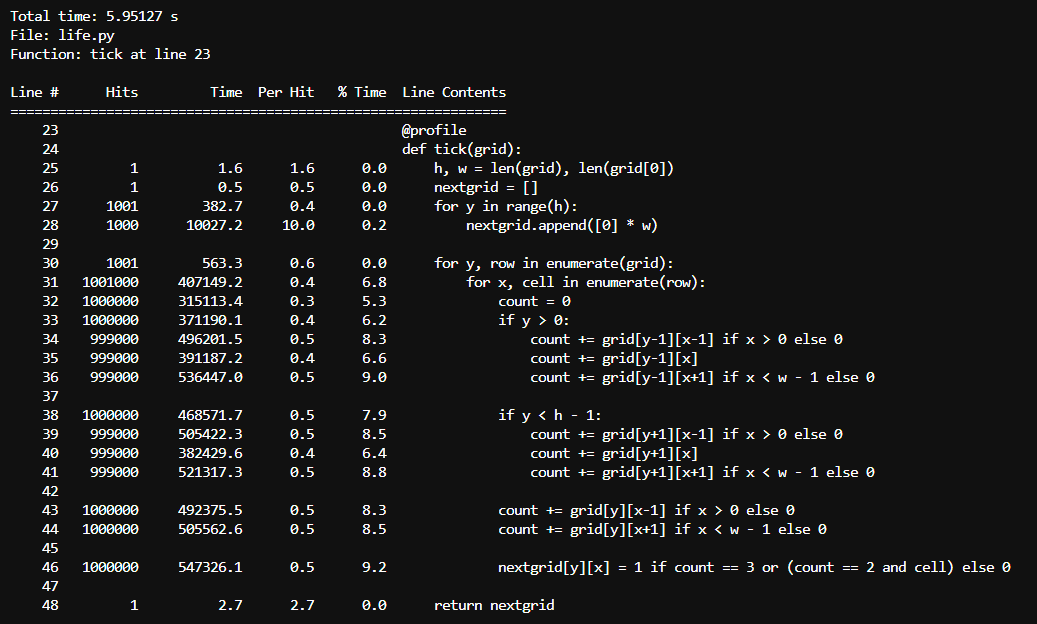

#### Memory Profiler

##### Read Function
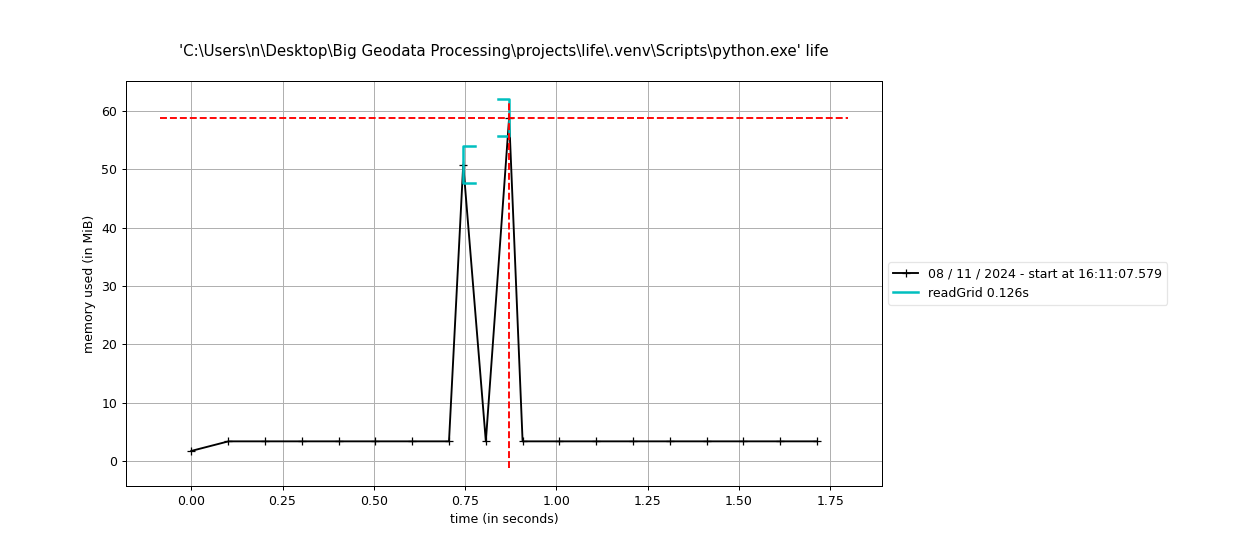

##### Tick Function
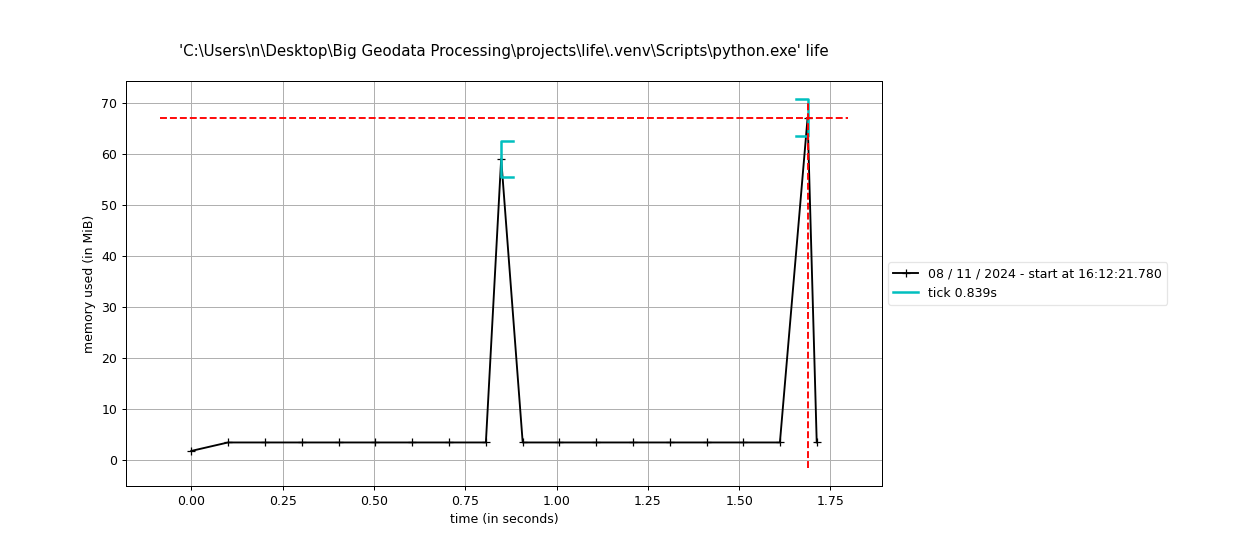

### After optimization

#### Line Profiler

##### Reading the grid
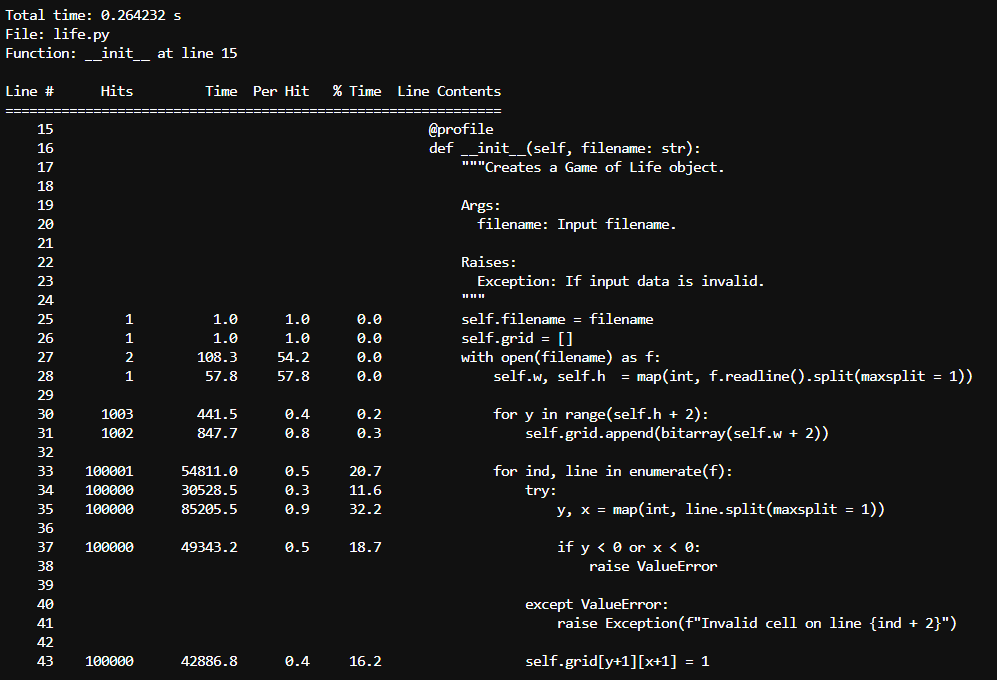

##### Tick Function
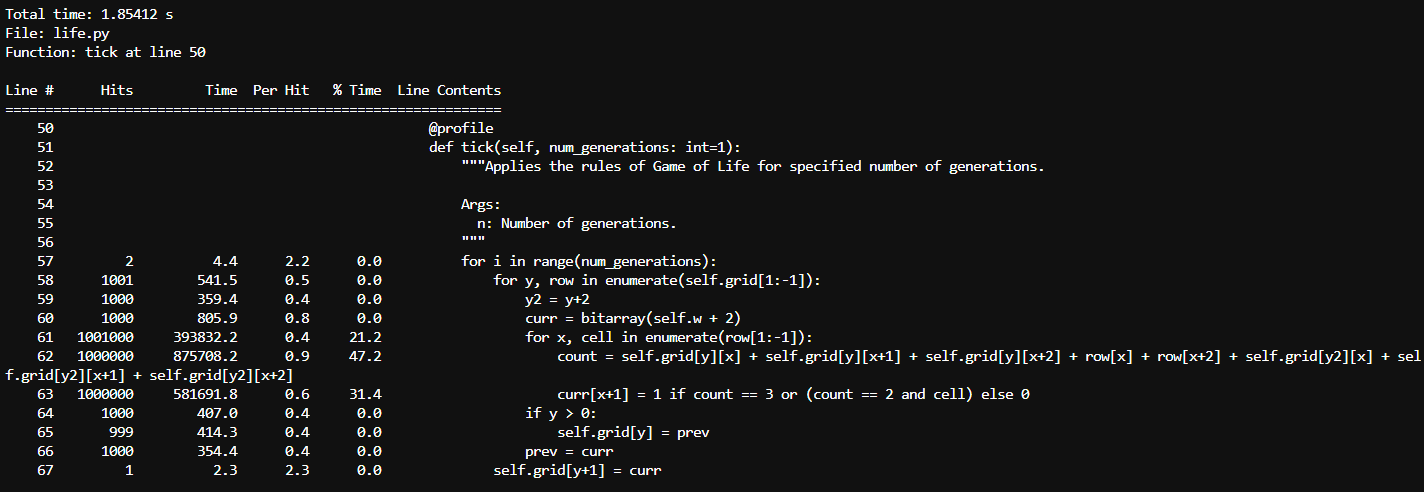

#### Memory Profiler

##### Read grid
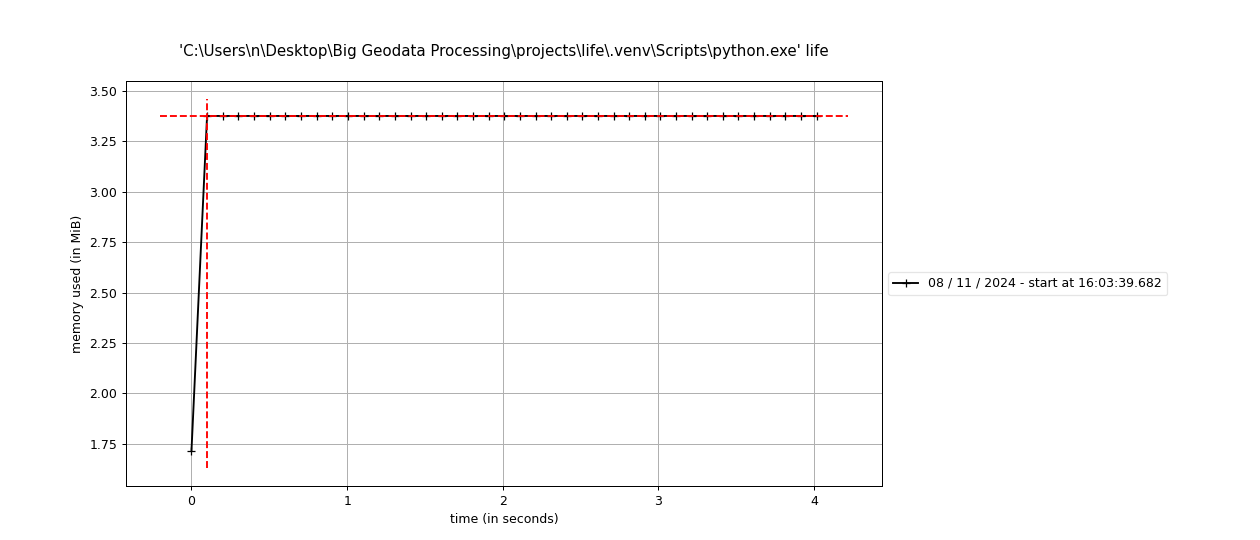

##### Tick Function
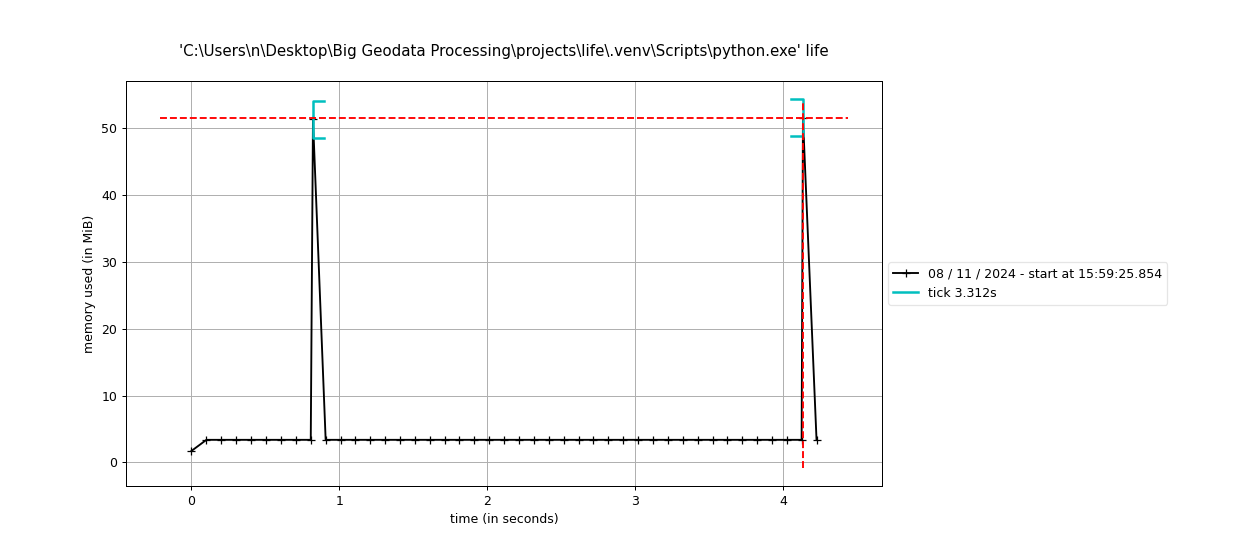

#### Save Function

##### Line Profiler
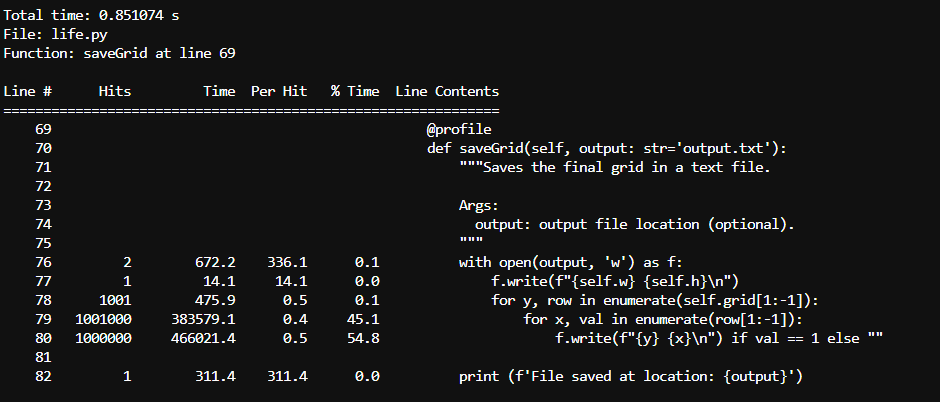


### Discussion of optimization

##### Reading grid function:
We can see that after the optimizations the line profiler does not show a great increase which tells that optimizations do not increase efficiency but we see that the memory profiler shows reduced memory usage, due to which we can process larger files


##### Tick Function:
We can see that for this, we see an enhancement in the efficiency of the execution where execution time drops by around 70% which is why we can process larger dataset much quicker. We can also see reduced memory usage making it suitable for larger datasets

##### Save Function:
We see that save function takes around 0.85 seconds. Implementing the list comprehension instead of using nested loops increased the performace.